# Setup

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Read data

In [2]:
urls = [
    "https://mrf.serifhealth.com/public/tic_extract_20250213.csv",
    "https://mrf.serifhealth.com/public/hpt_extract_20250213.csv"
]

filenames = [
    "tic_extract_20250213.csv",
    "hpt_extract_20250213.csv"
]

In [3]:
# Download files if don't exist yet

for filename, url in zip(filenames, urls):
    if not os.path.exists(filename):
        # Download
        response = requests.get(url)
        with open(filename, "wb") as file:
            file.write(response.content)
            print("File downloaded successfully!")
    else:
        print(f"File '{filename}' already exists. Skipping download.")

File 'tic_extract_20250213.csv' already exists. Skipping download.
File 'hpt_extract_20250213.csv' already exists. Skipping download.


In [4]:
df_tic = pd.read_csv(filenames[0])
df_hpt = pd.read_csv(filenames[1])

In [5]:
df_tic.head(3)

,payer,network_name,network_id,network_year_month,network_region,code,code_type,ein,taxonomy_filtered_npi_list,modifier_list,billing_class,place_of_service_list,negotiation_type,arrangement,rate,cms_baseline_schedule,cms_baseline_rate
0,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,872,MS-DRG,131740114,"1003990763,1023202793,1063525152,1063606739,10...",NaN,institutional,NaN,negotiated,ffs,15902.00,IPPS,6829.75
1,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,99283,CPT,131624096,"1003255670,1245759711,1487026522,1598095267,16...",NaN,professional,11,negotiated,ffs,123.86,PFS_NONFACILITY_1320201,76.89
2,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,43239,CPT,131740114,"1700348620,1700892056,1922539964,1942685292",NaN,professional,11,negotiated,ffs,993.92,PFS_NONFACILITY_1320202,424.76


In [6]:
df_hpt.head(3)

,source_file_name,hospital_id,hospital_name,last_updated_on,hospital_state,license_number,payer_name,plan_name,code_type,raw_code,description,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
0,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Medicare,CPT,99283,EMERGENCY DEPT VISIT LOW MDM,outpatient,NaN,NaN,NaN,323.34,NaN,83.78,1009.22,fee schedule,NaN,NaN
1,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,HealthFirst,Commercial Enrollees,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,outpatient,NaN,NaN,NaN,1037.65,NaN,165.40,3206.34,fee schedule,NaN,NaN
2,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Commercial,CPT,43239,UPPER GI ENDOSCOPY BIOPSY,outpatient,NaN,NaN,NaN,1246.73,NaN,1246.73,1394.79,fee schedule,NaN,NaN


# Data exploration

## Payers data set

In [7]:
# Explore the unique values for each column

def print_unique_values_in_col(df):
    """
    For each column in the data frame, print the number of unique values.
    If there aren't too many, print the values too.
    """
    cols = df.columns

    print("*********************************")
    print("column_name: number_unique_values")
    print("\tval1\n\tval2\n\tval3")
    print("*********************************\n")
    
    for c in cols:
        n_unique_values = df[c].unique().shape[0]
        print(c, ": ", n_unique_values)
        
        if n_unique_values<10:
            value_counts = df[c].value_counts()
            print("\t|", value_counts.to_string(header=False).replace('\n', '\n\t| '))
        else:
            print("\t| Too many values to print")


In [8]:
print_unique_values_in_col(df_tic)

*********************************
column_name: number_unique_values
	val1
	val2
	val3
*********************************

payer :  3
	| aetna                133
	| unitedhealthcare      45
	| cigna-corporation     44
network_name :  3
	| open-access-managed-choice    133
	| choice-plus                    45
	| national-oap                   44
network_id :  3
	| 39f0d406-b5df-4046-9759-f08565e45db7    133
	| 592bc118-0dac-4f38-949c-11dc9b3a3879     45
	| 5dbd8f1c-3f56-4806-917b-e495668bf2bf     44
network_year_month :  1
	| 202501    222
network_region :  1
	| USA    222
code :  3
	| 43239    103
	| 99283    100
	| 872       19
code_type :  2
	| CPT       203
	| MS-DRG     19
ein :  3
	| 131740114    118
	| 133971298     55
	| 131624096     49
taxonomy_filtered_npi_list :  107
	| Too many values to print
modifier_list :  3
	| GT, 95    5
	| 95, GT    2
billing_class :  2
	| professional     177
	| institutional     45
place_of_service_list :  13
	| Too many values to print
negotiation_t

In [9]:
len(df_tic)

222

### Learnings
The payer data set contains:
* 222 entries
* 3 insurances (aetna, unitedhealthcare, cigna-corporation)
* 3 billing codes (43239, 99283, 872)
* 2 code types (CPT, MS-DRG)
* 3 EIN (131740114, 133971298, 131624096)

### Cleaning of the payers data set
* We eliminate columns that contain the same value in all rows. For reference, here is the value:
    * network_year_month (202501)
    * network_region (USA)
    * arrangement (ffs)


In [10]:
df_tic.drop(columns=["network_year_month", "network_region", "arrangement"], inplace=True)

## Hospital data set

In [11]:
print_unique_values_in_col(df_hpt)

*********************************
column_name: number_unique_values
	val1
	val2
	val3
*********************************

source_file_name :  3
	| 133971298-1801992631_nyu-langone-tisch_standardcharges.csv.gz    2322
	| 13-1740114_montefiore-medical-center_standardcharges.csv.gz       380
	| 131624096_mount-sinai-hospital_standardcharges.csv.gz             248
hospital_id :  3
	| 40e6a8c8-a68c-4d28-b1d5-fa70d6d09636    2322
	| 62915ae8-8d64-4e2f-b05f-b18edde57a3d     380
	| 5954cbad-a7c5-43f7-b356-8f2ecdad579a     248
hospital_name :  3
	| NYU Langone                  2322
	| Montefiore Medical Center     380
	| The Mount Sinai Hospital      248
last_updated_on :  3
	| 2025-01-01    2322
	| 2024-07-01     380
	| 2024-09-16     248
hospital_state :  1
	| NY    2950
license_number :  3
	| 7002053H      2322
	| 13-1740114     380
	| 330024         248
payer_name :  73
	| Too many values to print
plan_name :  538
	| Too many values to print
code_type :  3
	| CPT       2162
	| LOCAL      410

In [12]:
len(df_hpt)

2950

### Learnings
The hospital data set contains:
* 2950 entries
* 3 hospitals (NYU Langone, Montefiore Medical Center, The Mount Sinai Hospital).
    * The corresponding hospital IDs and license numbers
* Many payers (73) and plans (538)
* 3 code types (CPT, LOCAL, MS-DRG)
* Some entries in raw_code are "MS-DRG 872" when they should be "872", without the code_type. We fix this below
* 3 settings (both, inpatient, outpatient)

### Cleaning of the hospitals data set
* We eliminate columns that contain the same value in all rows. For reference, here is the value:
    *  hospital_state (NY)
    *  We also eliminate source_file_name, which seems irrelevant at this stage 
* We change raw_code = "MS-DRG 872" to "872"

In [13]:
# Correct raw_code
df_hpt.loc[df_hpt["raw_code"]=="MS-DRG 872", "raw_code"] = "872"

# Drop columns
df_hpt.drop(columns=["hospital_state", "source_file_name"], inplace=True)

#### Billing codes and descriptions
We're interested in the descriptions associated to each raw_code.

We see below that a single raw_code may be associated to multiple descriptions. 
At this point we have two hypothesis for this:
* The different descriptions are equivalent. We can ignore them and use raw_code to uniquely determine billing codes
* A raw_code may have variants, in the same fashion as "variants"

Given the time constraints, we assume the former and we ignore descriptions. Which BTW they contain typos (EDG vs EGD)

In [14]:
df_hpt[["raw_code", "description"]].value_counts().to_frame().sort_values(by=["raw_code", "count"], ascending=False)

count
raw_code description                                              
99283    HC EMERGENCY DEPT VISIT LVL 3                         417
         HC EMERG DEPT F/U VISIT LVL 3                         410
         PR EMERGENCY DEPARTMENT VISIT LOW MDM                  58
         EMERGENCY DEPT VISIT LOW MDM                           55
         Emer Dept Moderate Severity - 99283                    34
         HC ED Visit Level 3 Pa                                 34
         HC Psych ED Visit Level 3                              34
         Emergency dept visit low mdm                            3
         EMERGENCY DEPARTMENT VISIT MODERATE SEVERITY            1
872      SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOUR...    378
43239    EGD BIOPSY SINGLE/MULTIPLE                            479
         HC UGI W BX. SGL/MULTIPLE                             410
         HEAD HUM 19MM 50MM SHLDR UNIVERS STRL LF CUF AR...    410
         PR EDG TRANSORAL BIOPSY SINGLE/MULTIPLE               118
         HC Egd Transoral Biopsy Single/Multiple                43
         Egd Transoral Biopsy Single/Multiple - 43239           37
         Egd biopsy single/multiple                             20
         UPPER GI ENDOSCOPY BIOPSY                               6
         HC EGD BIOPSY SINGLE/MULTIPLE                           2
         EGD TRANSORAL BIOPSY SINGLE/MULTIPLE                    1

### Standard charge methodology
Looking at standard_charge_methodology, we notice that there are many possibilities. Given that in the payers table we saw that the arrangement is always ffs (Fee For Service), we suspect that we may want to filter to select only the cases with standard_charge_methodology = fee schedule (or Fee Schedule)

In [15]:
df_hpt[["standard_charge_methodology"]].value_counts().to_frame().sort_values(by=["count"], ascending=False)

,count
standard_charge_methodology,
Case Rate,1316
percent of total billed charges,613
fee schedule,322
Fee Schedule,224
case rate,81
Case rate,80
Percent of total billed charges,51
other,34
Other,8


We extract here a table linking hospital names and license numbers (we will add EIN later):

In [16]:
df_hospital_names = df_hpt[["hospital_name", "license_number"]].value_counts().to_frame()
df_hospital_names.reset_index(level=1, inplace=True)
df_hospital_names

,license_number,count
hospital_name,,
NYU Langone,7002053H,2322
Montefiore Medical Center,13-1740114,380
The Mount Sinai Hospital,330024,248


## Reproducing the example from the instructions: Aetna commercial x code 43239 x Montefiore Medical Center

### Hospital data set

In [17]:
# First let's identify this combination in the hospital data set:

df_hpt[
    (df_hpt["hospital_name"]=="Montefiore Medical Center") 
    & (df_hpt["raw_code"]=="43239")
    & (df_hpt["payer_name"].str.lower()=="aetna")
    & (df_hpt["plan_name"].str.lower()=="commercial")
]

,hospital_id,hospital_name,last_updated_on,license_number,payer_name,plan_name,code_type,raw_code,description,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
2,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,43239,UPPER GI ENDOSCOPY BIOPSY,outpatient,NaN,NaN,NaN,1246.73,NaN,1246.73,1394.79,fee schedule,NaN,NaN
97,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,43239,PR EDG TRANSORAL BIOPSY SINGLE/MULTIPLE,both,NaN,1790.0,1163.50,685.88,NaN,146.49,1733.49,fee schedule,NaN,NaN
1393,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,outpatient,NaN,NaN,NaN,4343.00,NaN,2518.00,9347.00,case rate,NaN,NaN
1420,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,43239,PR EDG TRANSORAL BIOPSY SINGLE/MULTIPLE,both,NaN,3925.0,2551.25,685.88,NaN,146.49,1733.49,fee schedule,NaN,NaN


We observe 4 results. 
* The first one has standard_charge_negotiated_dollar = 1246.73 mentioned in the exercise description. 
* The 3rd result has standard_charge_methodology = case rate, which we ignore it as mentioned above.
* The 2nd and 4th rows correspond to a both setting, vs outpatient for the 1st. This may explain the different standard_charge_negotiated_dollar of 685.88.

*In summary, the two relevant negotiated rates are 685.88 and 1246.73.*

### Payers data set

We noticed in the previous df_hospital_names that the license number for Montefiore Medical Center
is very similar to one EIN in the payers table. Therefore we use EIN to identify hospitals.
Using google we relate EIN to hospitals and add this to df_hospital_names:


In [18]:
df_hospital_names["ein"] = {"NYU Langone": 133971298,
                            "Montefiore Medical Center": 131740114,
                            "The Mount Sinai Hospital": 131624096
                            }

In [19]:
df_hospital_names

,license_number,count,ein
hospital_name,,,
NYU Langone,7002053H,2322,133971298
Montefiore Medical Center,13-1740114,380,131740114
The Mount Sinai Hospital,330024,248,131624096


In [20]:
df_tic[
    (df_tic["code"]==43239)
    & (df_tic["payer"]=="aetna")
    & (df_tic["ein"]==131740114)
    # & (df_tic["negotiation_type"]=="negotiated")
].sort_values(by=["rate"]).reset_index()
#.dropna(subset=["taxonomy_filtered_npi_list"])

,index,payer,network_name,network_id,code,code_type,ein,taxonomy_filtered_npi_list,modifier_list,billing_class,place_of_service_list,negotiation_type,rate,cms_baseline_schedule,cms_baseline_rate
0,146,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1063525152,1871834705",NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",percentage,70.00,PFS_NONFACILITY_1320202,424.76
1,80,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1063525152,1871014027",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,148.43,PFS_FACILITY_1320202,155.38
2,186,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1043606130,1063525152",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,153.66,PFS_FACILITY_0111263,138.29
3,185,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1063525152,1740674142",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1320202,155.38
4,183,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1033504303,1063525152",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1240201,145.77
5,46,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,1063525152,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1320202,155.38
6,189,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1320202,155.38
7,37,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1320202,155.38
8,171,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1063525152,1871014027",NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,178.13,PFS_FACILITY_1320202,155.38
9,162,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,1063525152,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,180.87,PFS_FACILITY_1320202,155.38


There are 41 results. The only feature columns that vary are:
* taxonomy_filtered_npi_list
* billing_class
* place_of_service_list
* negotiation_type
* cms_baseline_schedule & cms_baseline_rate

We focus on the NPI list. The reason is that it seems reasonable to assume that of all the results for a combinations of billing_code x payer x hospital, the one that covers more providers (NPI) from that facility is the code that will actually be used, instead of billing different rates for different NPIs. 

**So we will add a column called npi_count**

In [21]:
npi_count = df_tic["taxonomy_filtered_npi_list"].str.split(',').str.len().fillna(0).astype(int)
df_tic.insert(7, "npi_count", npi_count)

In [22]:
# Show the payers table again, now with npi_count

df_tic[
    (df_tic["code"]==43239)
    & (df_tic["payer"]=="aetna")
    & (df_tic["ein"]==131740114)
    # & (df_tic["negotiation_type"]=="negotiated")
].sort_values(by=["npi_count"], ascending=False).reset_index()
#.dropna(subset=["taxonomy_filtered_npi_list"])

,index,payer,network_name,network_id,code,code_type,ein,taxonomy_filtered_npi_list,npi_count,modifier_list,billing_class,place_of_service_list,negotiation_type,rate,cms_baseline_schedule,cms_baseline_rate
0,37,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1221,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1320202,155.38
1,175,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1221,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,571.77,PFS_FACILITY_1320202,155.38
2,68,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1221,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,453.63,PFS_NONFACILITY_1320202,424.76
3,62,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1221,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,1651.10,PFS_NONFACILITY_1320202,424.76
4,189,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1220,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,168.25,PFS_FACILITY_1320202,155.38
5,164,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1220,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,1651.10,PFS_NONFACILITY_1320202,424.76
6,82,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1220,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,571.77,PFS_FACILITY_1320202,155.38
7,152,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1003112954,1003142571,1003175597,1003178732,10...",1220,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,453.63,PFS_NONFACILITY_1320202,424.76
8,41,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1235324534,1750528188,1811013824,1871834705,18...",7,NaN,institutional,"01,06,08,12,19,20,22,23,24,25,26,27,41,42,50,5...",negotiated,4700.00,OPPS,937.56
9,69,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,131740114,"1235324534,1750528188,1811013824,1871834705,18...",7,NaN,institutional,"01,06,08,12,19,20,22,23,24,25,26,27,41,42,50,5...",negotiated,11500.00,OPPS,937.56


* We see that 8 entries have npi_count = 1220 or 1221, while the rest 7 or less. These 8 entries don't really have any feature that distinguishes among them, so we can't do any better and end with a range of rates 168.25 - 1651.10. 
* Note that the payers table doesn't have a column for the insurance plan. So these may be rates for various plans.

# Other examples

### Case 2
Let's try with code = 99283 (and Montefiore, aetna commerical)

In [23]:
df_hpt[
    (df_hpt["hospital_name"]=="Montefiore Medical Center") 
    & (df_hpt["raw_code"]=="99283")
    & (df_hpt["payer_name"].str.lower()=="aetna")
    & (df_hpt["plan_name"].str.lower()=="commercial")
]

,hospital_id,hospital_name,last_updated_on,license_number,payer_name,plan_name,code_type,raw_code,description,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
143,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,99283,EMERGENCY DEPT VISIT LOW MDM,outpatient,NaN,NaN,NaN,343.75,NaN,343.75,384.57,fee schedule,NaN,NaN
1427,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,99283,PR EMERGENCY DEPARTMENT VISIT LOW MDM,both,NaN,385.0,250.25,261.59,NaN,64.75,366.24,fee schedule,NaN,NaN
1530,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,99283,EMERGENCY DEPT VISIT LOW MDM,outpatient,NaN,NaN,NaN,377.13,NaN,83.78,1009.22,fee schedule,NaN,NaN


In [24]:
df_tic[
    (df_tic["code"]==99283)
    & (df_tic["payer"]=="aetna")
    & (df_tic["ein"]==131740114)
    # & (df_tic["negotiation_type"]=="negotiated")
].sort_values(by=["npi_count"], ascending=False).reset_index()
#.dropna(subset=["taxonomy_filtered_npi_list"])

,index,payer,network_name,network_id,code,code_type,ein,taxonomy_filtered_npi_list,npi_count,modifier_list,billing_class,place_of_service_list,negotiation_type,rate,cms_baseline_schedule,cms_baseline_rate
0,85,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2707,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,77.29,PFS_NONFACILITY_1320202,78.59
1,173,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2707,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,298.06,PFS_NONFACILITY_1320202,78.59
2,79,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2707,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,65.70,PFS_NONFACILITY_1320202,78.59
3,90,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2707,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,57.96,PFS_NONFACILITY_1320202,78.59
4,64,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2707,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,46.39,PFS_NONFACILITY_1320202,78.59
5,44,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2706,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,46.39,PFS_NONFACILITY_1320202,78.59
6,34,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2706,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,298.06,PFS_NONFACILITY_1320202,78.59
7,176,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2706,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,65.70,PFS_NONFACILITY_1320202,78.59
8,149,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2706,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,57.96,PFS_NONFACILITY_1320202,78.59
9,70,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,99283,CPT,131740114,"1003029026,1003112954,1003142571,1003173477,10...",2706,NaN,professional,"01,02,03,04,05,06,07,08,10,11,12,13,14,15,17,1...",negotiated,77.29,PFS_NONFACILITY_1320202,78.59


In this case, the hospital data set shows 3 negotiated rates: 261.59-377.13. The payers data set shows that for high npi counts the rate varies between 46.39-298.06.

### Case 3
Let's try with code = 43239 x NYU Langone x aetna (in this case we don't find cases under the Commercial plan, so we select all the plans)

In [25]:
df_hpt[
    (df_hpt["hospital_name"]=="NYU Langone") 
    & (df_hpt["raw_code"]=="43239")
    & (df_hpt["payer_name"].str.lower()=="aetna")
    # & (df_hpt["plan_name"].str.lower()=="commercial")
]

,hospital_id,hospital_name,last_updated_on,license_number,payer_name,plan_name,code_type,raw_code,description,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
283,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,aetnapos1009,LOCAL,43239,HEAD HUM 19MM 50MM SHLDR UNIVERS STRL LF CUF A...,both,NaN,32829.50,6237.61,6894.20,21.0,NaN,NaN,percent of total billed charges,21 percent of billed charges. Add on payment,NaN
284,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,aetnahmo1005,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,both,NaN,NaN,NaN,8124.66,NaN,NaN,NaN,Case Rate,". Primary procedure pays at 100%, secondary at...",NaN
366,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,aetnappo1010,LOCAL,43239,HEAD HUM 19MM 50MM SHLDR UNIVERS STRL LF CUF A...,both,NaN,32829.50,6237.61,6894.20,21.0,NaN,NaN,percent of total billed charges,21 percent of billed charges. Add on payment,NaN
459,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,aetnaindemnity1006,CPT,43239,HC UGI W BX. SGL/MULTIPLE,both,NaN,1464.39,278.23,1464.39,100.0,NaN,NaN,percent of total billed charges,100 percent of billed charges,NaN
499,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,aetnaopenaccesselectchoice(epo)1415,CPT,43239,HC UGI W BX. SGL/MULTIPLE,both,NaN,1464.39,278.23,8124.66,NaN,NaN,NaN,Case Rate,". Primary procedure pays at 100%, secondary at...",NaN
566,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,starmark1643,CPT,43239,HC UGI W BX. SGL/MULTIPLE,both,NaN,1464.39,278.23,8124.66,NaN,NaN,NaN,Case Rate,". Primary procedure pays at 100%, secondary at...",NaN
593,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,wellnet1755,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,both,NaN,NaN,NaN,8124.66,NaN,NaN,NaN,Case Rate,". Primary procedure pays at 100%, secondary at...",NaN
614,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,geha1067,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,both,NaN,NaN,NaN,8124.66,NaN,NaN,NaN,Case Rate,". Primary procedure pays at 100%, secondary at...",NaN
630,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,wellnet1755,LOCAL,43239,HEAD HUM 19MM 50MM SHLDR UNIVERS STRL LF CUF A...,both,NaN,32829.50,6237.61,6894.20,21.0,NaN,NaN,percent of total billed charges,21 percent of billed charges. Add on payment,NaN
709,40e6a8c8-a68c-4d28-b1d5-fa70d6d09636,NYU Langone,2025-01-01,7002053H,aetna,allied3025,LOCAL,43239,HEAD HUM 19MM 50MM SHLDR UNIVERS STRL LF CUF A...,both,NaN,32829.50,6237.61,13788.39,42.0,NaN,NaN,percent of total billed charges,42 percent of billed charges. Add on payment. ...,NaN


In [26]:
df_tic[
    (df_tic["code"]==43239)
    & (df_tic["payer"]=="aetna")
    & (df_tic["ein"]==133971298)
    # & (df_tic["negotiation_type"]=="negotiated")
].sort_values(by=["npi_count"], ascending=False).reset_index()
#.dropna(subset=["taxonomy_filtered_npi_list"])

,index,payer,network_name,network_id,code,code_type,ein,taxonomy_filtered_npi_list,npi_count,modifier_list,billing_class,place_of_service_list,negotiation_type,rate,cms_baseline_schedule,cms_baseline_rate
0,193,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1023320298,1033499181,1033559471,1043283773,10...",127,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,174.07,PFS_FACILITY_1320202,155.38
1,191,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1023320298,1033499181,1033559471,1043283773,10...",127,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,493.95,PFS_NONFACILITY_1320202,424.76
2,91,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1023320298,1033499181,1033559471,1043283773,10...",127,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,494.46,PFS_NONFACILITY_1320202,424.76
3,140,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1023320298,1033499181,1033559471,1043283773,10...",127,NaN,professional,"02,19,21,22,23,24,26,31,34,41,42,51,52,53,56,61",negotiated,183.39,PFS_FACILITY_1320202,155.38
4,55,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1114925567,1275632895,1366541989,1427616002,14...",8,NaN,institutional,"01,06,08,12,19,20,22,23,24,25,26,27,41,42,50,5...",negotiated,8125.00,OPPS,937.56
5,60,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1114925567,1275632895,1366541989,1427616002,14...",8,NaN,institutional,"01,06,08,12,19,20,22,23,24,25,26,27,41,42,50,5...",negotiated,13583.00,OPPS,937.56
6,57,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1275632895,1437523537,1528432622,1619341716",4,NaN,institutional,"01,06,08,12,19,20,22,23,24,25,26,27,41,42,50,5...",negotiated,6906.00,OPPS,937.56
7,78,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1275632895,1437523537,1528432622,1619341716",4,NaN,institutional,"01,06,08,12,19,20,22,23,24,25,26,27,41,42,50,5...",negotiated,11546.00,OPPS,937.56
8,92,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1184007486,1598864118,1790975944",3,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,531.91,PFS_NONFACILITY_1320201,413.17
9,177,aetna,open-access-managed-choice,39f0d406-b5df-4046-9759-f08565e45db7,43239,CPT,133971298,"1184007486,1598864118,1790975944",3,NaN,professional,"01,03,04,05,06,07,08,10,11,12,13,14,15,17,18,2...",negotiated,843.44,PFS_NONFACILITY_1320201,413.17


In this examples the rates are radically different. The hospital data set has rates in the many thousands. While the payer data set is in the range 174-494.

# Exploring the number of (billing code x payer x hospital) combinations

## Hospital data set

In [27]:
# First get list of the correct payer names in the hospital data

sorted(df_hpt["payer_name"].unique(), key=str.casefold)

['1199',
 'Aetna',
 'aetna',
 'Affinity',
 'Agewell',
 'American',
 'amida',
 'Amida Care',
 'Amidacare',
 'Archcare',
 'bcbs',
 'Beacon',
 'Bright Health',
 'Brighton Health',
 'Centerlight',
 'centerlight',
 'CentersPlan',
 'Centivo',
 'Christian',
 'Cigna',
 'cigna',
 'Elderplan',
 'Emblem',
 'Empire',
 'Empire Healthplus',
 'Empire Medicare Advantage',
 'Fidelis',
 'fidelis',
 'firsthealth',
 'ghi',
 'Hamaspik',
 'hamaspikchoice',
 'Healthcare',
 'HealthFirst',
 'healthfirst',
 'healthplus',
 'hip',
 'Horizon',
 'Humana',
 'Independence Care',
 'Lifetrac',
 'Longevity',
 'Magnacare',
 'magnacare',
 'medicaid',
 'medicare',
 'MetroPlus',
 'metroplus',
 'Molina',
 'Multiplan',
 'multiplan',
 'MVP',
 'Nat',
 'Nippon',
 'Northwell',
 'Oscar',
 'Oxford',
 'oxford',
 'Partners',
 'SEIU1199',
 'Senior',
 'somos',
 'threerivers',
 'UHC',
 'uhc',
 'United',
 'United Healthcare',
 'VillageCareMAX',
 'VNS',
 'VNSNY',
 'WellCare',
 'Wellcare',
 'wellcare']

**We need to consolidate the multiple names for UHC in the hospital table**

We skip consolidating other payers that are not part of the three studied in this exercise (Aetna, UHC, cigna)

In [28]:
# Consolidate the multiple names for UHC

df_hpt.loc[df_hpt["payer_name"].str.lower().isin(["united healthcare", "united", "uhc"]), "payer_name"] = "uhc"

In [29]:
# Filter out the payers that are not in the payer data set. That is, select Aetna, UHC, cigna
df_hpt_3payers = df_hpt[df_hpt["payer_name"].str.lower().isin(["aetna", "uhc", "cigna"])]
df_hpt_3payers.head(2)

,hospital_id,hospital_name,last_updated_on,license_number,payer_name,plan_name,code_type,raw_code,description,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
0,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Medicare,CPT,99283,EMERGENCY DEPT VISIT LOW MDM,outpatient,NaN,NaN,NaN,323.34,NaN,83.78,1009.22,fee schedule,NaN,NaN
2,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,13-1740114,Aetna,Commercial,CPT,43239,UPPER GI ENDOSCOPY BIOPSY,outpatient,NaN,NaN,NaN,1246.73,NaN,1246.73,1394.79,fee schedule,NaN,NaN


In [30]:
df_hpt_3payers[["hospital_name", "payer_name", "raw_code", "code_type"]]\
.value_counts()\
.to_frame()\
.sort_values(by=["hospital_name", "payer_name", "raw_code"])

#"plan_name"

count
hospital_name             payer_name raw_code code_type       
Montefiore Medical Center Aetna      43239    CPT            9
                                     872      MS-DRG         3
                                     99283    CPT            7
                          Cigna      43239    CPT            5
                                     872      MS-DRG         1
                                     99283    CPT            3
                          uhc        43239    CPT           10
                                     872      MS-DRG         4
                                     99283    CPT            5
NYU Langone               aetna      43239    CPT           38
                                              LOCAL         19
                                     872      MS-DRG        18
                                     99283    CPT           38
                          cigna      43239    CPT           34
                                              LOCAL         17
                                     872      MS-DRG        17
                                     99283    CPT           34
                          uhc        43239    CPT           29
                                              LOCAL         16
                                     872      MS-DRG        12
                                     99283    CPT           32
The Mount Sinai Hospital  Aetna      43239    CPT            5
                                     872      MS-DRG         4
                                     99283    CPT            3
                          Cigna      43239    CPT            1
                                     872      MS-DRG         1
                          uhc        43239    CPT            3
                                     872      MS-DRG         2
                                     99283    CPT            3

## Payers data set

In [31]:
df_tic[["ein", "payer", "code", "code_type"]]\
.value_counts()\
.to_frame()\
.sort_values(by=["ein", "payer", "code"])


count
ein       payer             code  code_type       
131624096 aetna             872   MS-DRG         6
                            43239 CPT            8
                            99283 CPT            5
          cigna-corporation 872   MS-DRG         2
                            43239 CPT            6
                            99283 CPT            5
          unitedhealthcare  872   MS-DRG         4
                            43239 CPT            8
                            99283 CPT            5
131740114 aetna             43239 CPT           41
                            99283 CPT           41
          cigna-corporation 872   MS-DRG         1
                            43239 CPT            6
                            99283 CPT           12
          unitedhealthcare  872   MS-DRG         1
                            43239 CPT            7
                            99283 CPT            9
133971298 aetna             43239 CPT           18
                            99283 CPT           14
          cigna-corporation 872   MS-DRG         1
                            43239 CPT            3
                            99283 CPT            8
          unitedhealthcare  872   MS-DRG         4
                            43239 CPT            6
                            99283 CPT            1

# Combining data sets

## Unifying naming conventions in the table schemas

Before integrating both data sets, we need to further consolidate:
* Column names
* Column values
* Add EINs to the hospital table

Payers table. Columns to keep / create:
* payer
* network_name
* network_id
* code
* code_type
* EIN
* npi_count
* billing_class (_mode)
* negotiation_type (_mode)
* rate_tic


* rate_tic_min
* rate_tic_max
* rate_tic_median

In [32]:
df_tic_unified = df_tic[[
    "payer",
    "network_name",
    "network_id",
    "code",
    "code_type",
    "ein",
    "npi_count",
    "billing_class",
    "negotiation_type",
    "rate"
]].copy()

df_tic_unified.head(2)

,payer,network_name,network_id,code,code_type,ein,npi_count,billing_class,negotiation_type,rate
0,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,872,MS-DRG,131740114,23,institutional,negotiated,15902.00
1,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,99283,CPT,131624096,6,professional,negotiated,123.86


Hospital table. Columns to keep / create:
* hospital_id
* hospital_name
* license_number
* EIN
* payer_name -> payer
* raw_code -> code
* code_type
* standard_charge_negotiated_dollar -> rate_hpt


* rate_hpt_min
* rate_hpt_max
* rate_hpt_median

In [33]:
df_hpt_unified = df_hpt_3payers[[
    "hospital_id",
    "hospital_name",
    "license_number",
    "payer_name",
    "raw_code",
    "code_type",
    "standard_charge_negotiated_dollar"
]].copy()

df_hpt_unified.rename(columns={
    "standard_charge_negotiated_dollar": "rate",
    "payer_name": "payer",
    "raw_code": "code",
    }, inplace=True)

# Add EIN (take it from df_hospital_names)
df_hpt_unified = pd.merge(df_hpt_unified, df_hospital_names[["ein"]], on="hospital_name")

df_hpt_unified.head(2)

,hospital_id,hospital_name,license_number,payer,code,code_type,rate,ein
0,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,13-1740114,Aetna,99283,CPT,323.34,131740114
1,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,13-1740114,Aetna,43239,CPT,1246.73,131740114


## Unifying value names

In [34]:
# Unify values in the payer table

# Payer names
df_tic_unified.loc[df_tic_unified["payer"].str.lower().isin(["unitedhealthcare"]), "payer"] = "uhc"
df_tic_unified.loc[df_tic_unified["payer"].str.lower().isin(["cigna-corporation"]), "payer"] = "cigna"

print_unique_values_in_col(df_tic_unified)

*********************************
column_name: number_unique_values
	val1
	val2
	val3
*********************************

payer :  3
	| aetna    133
	| uhc       45
	| cigna     44
network_name :  3
	| open-access-managed-choice    133
	| choice-plus                    45
	| national-oap                   44
network_id :  3
	| 39f0d406-b5df-4046-9759-f08565e45db7    133
	| 592bc118-0dac-4f38-949c-11dc9b3a3879     45
	| 5dbd8f1c-3f56-4806-917b-e495668bf2bf     44
code :  3
	| 43239    103
	| 99283    100
	| 872       19
code_type :  2
	| CPT       203
	| MS-DRG     19
ein :  3
	| 131740114    118
	| 133971298     55
	| 131624096     49
npi_count :  41
	| Too many values to print
billing_class :  2
	| professional     177
	| institutional     45
negotiation_type :  3
	| negotiated      169
	| fee schedule     50
	| percentage        3
rate :  141
	| Too many values to print


In [35]:
# Unify values in the hospital table

# Payer names
df_hpt_unified.loc[df_hpt_unified["payer"].str.lower().isin(["aetna"]), "payer"] = "aetna"
df_hpt_unified.loc[df_hpt_unified["payer"].str.lower().isin(["cigna"]), "payer"] = "cigna"

print_unique_values_in_col(df_hpt_unified)

*********************************
column_name: number_unique_values
	val1
	val2
	val3
*********************************

hospital_id :  3
	| 40e6a8c8-a68c-4d28-b1d5-fa70d6d09636    304
	| 62915ae8-8d64-4e2f-b05f-b18edde57a3d     47
	| 5954cbad-a7c5-43f7-b356-8f2ecdad579a     22
hospital_name :  3
	| NYU Langone                  304
	| Montefiore Medical Center     47
	| The Mount Sinai Hospital      22
license_number :  3
	| 7002053H      304
	| 13-1740114     47
	| 330024         22
payer :  3
	| aetna    144
	| uhc      116
	| cigna    113
code :  3
	| 43239    186
	| 99283    125
	| 872       62
code_type :  3
	| CPT       259
	| MS-DRG     62
	| LOCAL      52
rate :  80
	| Too many values to print
ein :  3
	| 133971298    304
	| 131740114     47
	| 131624096     22


## Cleaning payers data set

### Filtering out cases with low npi_count

* For a combination of (payer x provider x code) we want to select the rows with high npi_count
* We set the minimum npi_count as half the maximum for that combination.
* Rates with an npi_count higher than that will be used to compute the final rate

In [36]:
df_npi_threshold = df_tic_unified.groupby(["ein", "payer", "code"]).agg(
    min=("npi_count", "min"),
    max=("npi_count", "max"),
    median=("npi_count", "median"),
    npi_threshold=("npi_count", lambda x: x.max()*0.5)
)

df_npi_threshold

min   max  median  npi_threshold
ein       payer code                                   
131624096 aetna 872      2     7     3.0            3.5
                43239    2     8     4.5            4.0
                99283    3    22    22.0           11.0
          cigna 872      2    10     6.0            5.0
                43239    3    16     3.5            8.0
                99283    1    28     6.0           14.0
          uhc   872      1    14     3.0            7.0
                43239    0    10     1.0            5.0
                99283    1    20     1.0           10.0
131740114 aetna 43239    0  1221     2.0          610.5
                99283    1  2707     2.0         1353.5
          cigna 872      1     1     1.0            0.5
                43239    1   836     4.0          418.0
                99283    1  1242     2.0          621.0
          uhc   872     23    23    23.0           11.5
                43239    1  1116    13.0          558.0
                99283    1  1460     1.0          730.0
133971298 aetna 43239    1   127     3.0           63.5
                99283    3    10     3.0            5.0
          cigna 872     19    19    19.0            9.5
                43239   18    69    18.0           34.5
                99283    1   108     9.5           54.0
          uhc   872      1    10     7.0            5.0
                43239    1    98     5.0           49.0
                99283  208   208   208.0          104.0

In [37]:
# Add npi_threshold to  df_tic_unified
df_tic_unified = pd.merge(df_tic_unified, df_npi_threshold["npi_threshold"], on=["ein", "payer", "code"])

# Delete rows with npi_count <= npi_threshold
df_tic_unified = df_tic_unified[df_tic_unified["npi_count"]>df_tic_unified["npi_threshold"]].reset_index(drop=True)

len(df_tic_unified)

56

## Compute rates for each (payer x provider x code) combination

In [38]:
# Hospital table

df_hpt_summary = df_hpt_unified.groupby([
    "ein",
    "hospital_name",
    "hospital_id",
    "payer",
    "code",
    "code_type",
    "license_number"
])["rate"].agg(["min", "max", "median"]).rename(columns={
    "min": "rate_hpt_min",
    "max": "rate_hpt_max",
    "median": "rate_hpt_median"
})

df_hpt_summary

rate_hpt_min  \
ein       hospital_name             hospital_id                          payer code  code_type license_number                 
131624096 The Mount Sinai Hospital  5954cbad-a7c5-43f7-b356-8f2ecdad579a aetna 43239 CPT       330024               1048.28   
                                                                               872   MS-DRG    330024              13708.20   
                                                                               99283 CPT       330024                329.95   
                                                                         cigna 43239 CPT       330024               4289.89   
                                                                               872   MS-DRG    330024              25906.60   
                                                                         uhc   43239 CPT       330024               1048.28   
                                                                               872   MS-DRG    330024              13708.20   
                                                                               99283 CPT       330024                329.95   
131740114 Montefiore Medical Center 62915ae8-8d64-4e2f-b05f-b18edde57a3d aetna 43239 CPT       13-1740114            157.52   
                                                                               872   MS-DRG    13-1740114          13434.30   
                                                                               99283 CPT       13-1740114             79.79   
                                                                         cigna 43239 CPT       13-1740114            841.81   
                                                                               872   MS-DRG    13-1740114          44909.82   
                                                                               99283 CPT       13-1740114            301.08   
                                                                         uhc   43239 CPT       13-1740114            153.09   
                                                                               872   MS-DRG    13-1740114          13570.00   
                                                                               99283 CPT       13-1740114             79.74   
133971298 NYU Langone               40e6a8c8-a68c-4d28-b1d5-fa70d6d09636 aetna 43239 CPT       7002053H             1037.64   
                                                                                     LOCAL     7002053H             6894.20   
                                                                               872   MS-DRG    7002053H            10076.87   
                                                                               99283 CPT       7002053H              326.60   
                                                                         cigna 43239 CPT       7002053H             1069.00   
                                                                                     LOCAL     7002053H            10932.22   
                                                                               872   MS-DRG    7002053H            24149.58   
                                                                               99283 CPT       7002053H             2102.05   
                                                                         uhc   43239 CPT       7002053H             1069.00   
                                                                                     LOCAL     7002053H             2462.21   
                                                                               872   MS-DRG    7002053H            24149.58   
                                                                               99283 CPT       7002053H             2102.05   

                                                                                                               rate_hpt_max  \
ein       hospital_name             hospital_i

In [39]:
# Payer table

df_tic_summary = df_tic_unified.groupby([
    "ein",
    "payer",
    "network_name",
    "network_id",
    "code",
    "code_type",
]).agg(
    rate_tic_min=("rate", "min"),
    rate_tic_max=("rate", "max"),
    rate_tic_median=("rate", "median"),
    billing_class_mode_tic=("billing_class", lambda x: x.mode().iloc[0]),
    negotiation_type_mode_tic=("negotiation_type", lambda x: x.mode().iloc[0]) 
)

df_tic_summary

rate_tic_min  \
ein       payer network_name               network_id                           code  code_type                 
131624096 aetna open-access-managed-choice 39f0d406-b5df-4046-9759-f08565e45db7 872   MS-DRG         13365.00   
                                                                                43239 CPT              168.25   
                                                                                99283 CPT               46.39   
          cigna national-oap               5dbd8f1c-3f56-4806-917b-e495668bf2bf 872   MS-DRG         25934.50   
                                                                                43239 CPT              821.14   
                                                                                99283 CPT              179.90   
          uhc   choice-plus                592bc118-0dac-4f38-949c-11dc9b3a3879 872   MS-DRG         16212.00   
                                                                                43239 CPT             6438.00   
                                                                                99283 CPT               83.96   
131740114 aetna open-access-managed-choice 39f0d406-b5df-4046-9759-f08565e45db7 43239 CPT              168.25   
                                                                                99283 CPT               46.39   
          cigna national-oap               5dbd8f1c-3f56-4806-917b-e495668bf2bf 872   MS-DRG         47574.46   
                                                                                43239 CPT              841.81   
                                                                                99283 CPT              253.26   
          uhc   choice-plus                592bc118-0dac-4f38-949c-11dc9b3a3879 872   MS-DRG         15902.00   
                                                                                43239 CPT             2465.06   
                                                                                99283 CPT              224.36   
133971298 aetna open-access-managed-choice 39f0d406-b5df-4046-9759-f08565e45db7 43239 CPT              174.07   
                                                                                99283 CPT             2490.00   
          cigna national-oap               5dbd8f1c-3f56-4806-917b-e495668bf2bf 872   MS-DRG         29907.25   
                                                                                43239 CPT              796.23   
                                                                                99283 CPT              108.57   
          uhc   choice-plus                592bc118-0dac-4f38-949c-11dc9b3a3879 872   MS-DRG         27924.63   
                                                                                43239 CPT              479.15   
                                                                                99283 CPT               70.43   

                                                                                                 rate_tic_max  \
ein       payer network_name               network_id                           code  code_type                 
131624096 aetna open-access-managed-choice 39f0d406-b5df-4046-9759-f08565e45db7 872   MS-DRG         17966.00   
                                                                                43239 CPT             5228.00   
                                                                                99283 CPT               77.29   
          cigna national-oap               5dbd8f1c-3f56-4806-917b-e495668bf2bf 872   MS-DRG         25934.50   
                                                                                43239 CPT              821.14   
                                                                                99283 CPT              179.90   
          uhc   choice-plus                592bc118-0dac-4f38-949c-11dc9b3a3879 872   MS-DRG         16212.00   
                            

## Combine tables

In [40]:
df1 = df_hpt_summary.reset_index()
df2 = df_tic_summary.reset_index()
df1["code"] = df1["code"].astype(int)

df_master = pd.merge(df1, df2, on=[
    "ein",
    "payer",
    "code",
    "code_type"
], how="outer"
)

df_master.set_index(["ein",
    "payer",
    "code",
    "code_type"
    ], inplace=True
)

df_master = df_master[[
    'hospital_name',
    'hospital_id',
    'license_number',
    'network_name',
    'network_id',
    'billing_class_mode_tic',
    'negotiation_type_mode_tic',
    'rate_hpt_min',
    'rate_hpt_max',
    'rate_hpt_median',
    'rate_tic_min',
    'rate_tic_max',
    'rate_tic_median',
]]

# Calculate rate_delta = rate_tic_median / rate_hpt_median
df_master["rate_delta"] = df_master["rate_tic_median"] / df_master["rate_hpt_median"]

df_master

hospital_name  \
ein       payer code  code_type                              
131624096 aetna 872   MS-DRG      The Mount Sinai Hospital   
                43239 CPT         The Mount Sinai Hospital   
                99283 CPT         The Mount Sinai Hospital   
          cigna 872   MS-DRG      The Mount Sinai Hospital   
                43239 CPT         The Mount Sinai Hospital   
                99283 CPT                              NaN   
          uhc   872   MS-DRG      The Mount Sinai Hospital   
                43239 CPT         The Mount Sinai Hospital   
                99283 CPT         The Mount Sinai Hospital   
131740114 aetna 872   MS-DRG     Montefiore Medical Center   
                43239 CPT        Montefiore Medical Center   
                99283 CPT        Montefiore Medical Center   
          cigna 872   MS-DRG     Montefiore Medical Center   
                43239 CPT        Montefiore Medical Center   
                99283 CPT        Montefiore Medical Center   
          uhc   872   MS-DRG     Montefiore Medical Center   
                43239 CPT        Montefiore Medical Center   
                99283 CPT        Montefiore Medical Center   
133971298 aetna 872   MS-DRG                   NYU Langone   
                43239 CPT                      NYU Langone   
                      LOCAL                    NYU Langone   
                99283 CPT                      NYU Langone   
          cigna 872   MS-DRG                   NYU Langone   
                43239 CPT                      NYU Langone   
                      LOCAL                    NYU Langone   
                99283 CPT                      NYU Langone   
          uhc   872   MS-DRG                   NYU Langone   
                43239 CPT                      NYU Langone   
                      LOCAL                    NYU Langone   
                99283 CPT                      NYU Langone   

                                                          hospital_id  \
ein       payer code  code_type                                         
131624096 aetna 872   MS-DRG     5954cbad-a7c5-43f7-b356-8f2ecdad579a   
                43239 CPT        5954cbad-a7c5-43f7-b356-8f2ecdad579a   
                99283 CPT        5954cbad-a7c5-43f7-b356-8f2ecdad579a   
          cigna 872   MS-DRG     5954cbad-a7c5-43f7-b356-8f2ecdad579a   
                43239 CPT        5954cbad-a7c5-43f7-b356-8f2ecdad579a   
                99283 CPT                                         NaN   
          uhc   872   MS-DRG     5954cbad-a7c5-43f7-b356-8f2ecdad579a   
                43239 CPT        5954cbad-a7c5-43f7-b356-8f2ecdad579a   
                99283 CPT        5954cbad-a7c5-43f7-b356-8f2ecdad579a   
131740114 aetna 872   MS-DRG     62915ae8-8d64-4e2f-b05f-b18edde57a3d   
                43239 CPT        62915ae8-8d64-4e2f-b05f-b18edde57a3d   
                99283 CPT        62915ae8-8d64-4e2f-b05f-b18edde57a3d   
          cigna 872   MS-DRG     62915ae8-8d64-4e2f-b05f-b18edde57a3d   
                43239 CPT        62915ae8-8d64-4e2f-b05f-b18edde57a3d   
                99283 CPT        62915ae8-8d64-4e2f-b05f-b18edde57a3d   
          uhc   872   MS-DRG     62915ae8-8d64-4e2f-b05f-b18edde57a3d   
                43239 CPT        62915ae8-8d64-4e2f-b05f-b18edde57a3d   
                99283 CPT        62915ae8-8d64-4e2f-b05f-b18edde57a3d   
133971298 aetna 872   MS-DRG     40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
                43239 CPT        40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
                      LOCAL      40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
                99283 CPT        40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
          cigna 872   MS-DRG     40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
                43239 CPT        40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
                      LOCAL      40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
                99283 CPT        40e6a8c8-a68c-4d28-b1d5-fa70d6d09636   
          uhc   

In [41]:
# save to cvs

df_master.to_csv("combined_hpt_tic.csv")

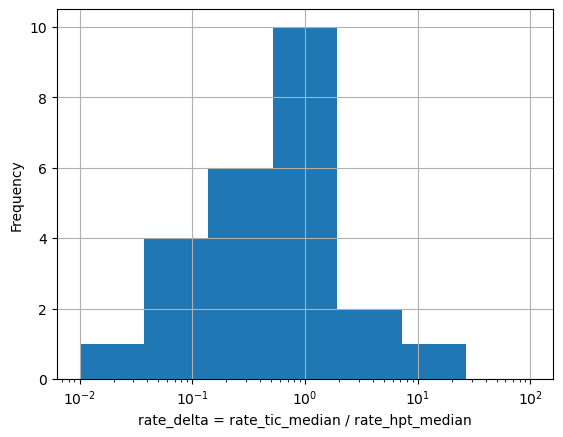

In [42]:
df_master['rate_delta'].hist(bins=10**np.linspace(-2, 2, 8))

plt.xscale('log')
plt.xlabel('rate_delta = rate_tic_median / rate_hpt_median')
plt.ylabel('Frequency')
plt.show()